# Упрощаем использование TL. Фреймворк Huggingface

## Первый семинар

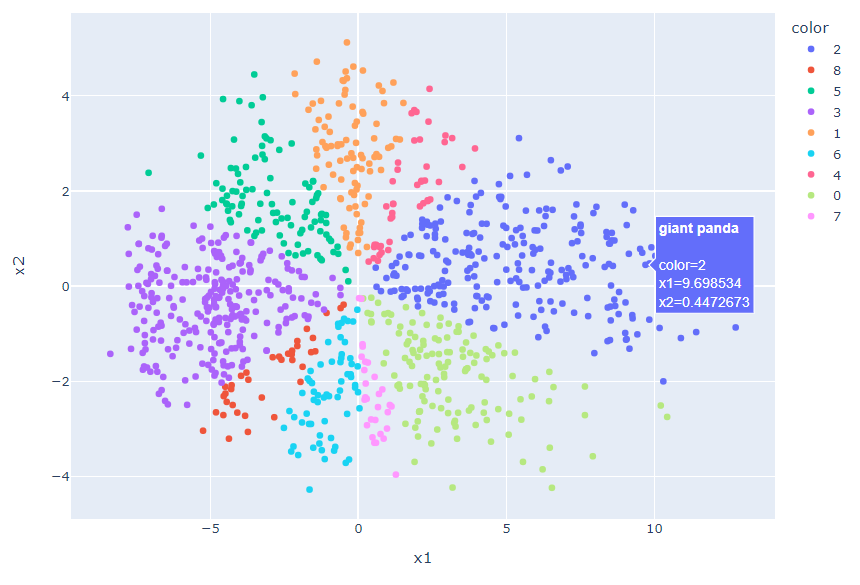

## Второй семинар

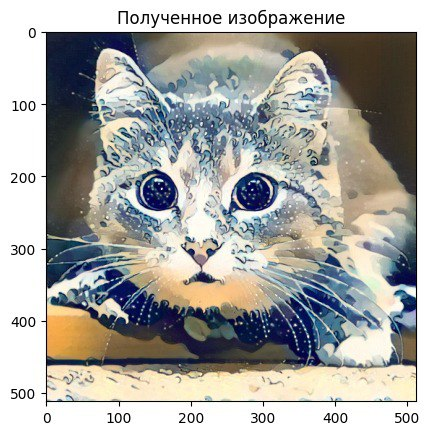

Вы уже получили представление, с чего начинается проект с нейросетями или откуда брать эмбеддинги.

- Например, вы можете взять Colab и создать поисковик по изображениям: https://blog.roboflow.com/clip-image-search-faiss/.
- Или можете создать рекомендательныю систему по текстовым описаниям товаров: https://www.kaggle.com/code/andrzejpackard/bert-and-faiss-for-recomendation-engine

Следующий шаг – упростить себе работу с широчайшим перечнем предобученных моделей.

Нам понадобится библиотека transformers.

In [1]:
#!pip install transformers

## Почему трансформеры?

- Не простые эмбеддинги, а позиционные (часть слова + положение в последовательности)
- 10-20 одинаковых модулей, которые постоянно рассылают друг другу "запросы"
- Каждый модуль практически равен строчке кода в программе (хотя может делать гораздо более сложные вещи)
- Очень эффективно вычисляется и распараллеливается

В предшествующих (реккурентных) сетях обучение и вычисление велось по цепочке. Тут все параллельно.

* GPT3 учитывал 8000.
* GPT4 учитывает 32000 токенов в качестве контекста (объем маленькой книги).
* Flash attention – 64000 (среднего размера книга)

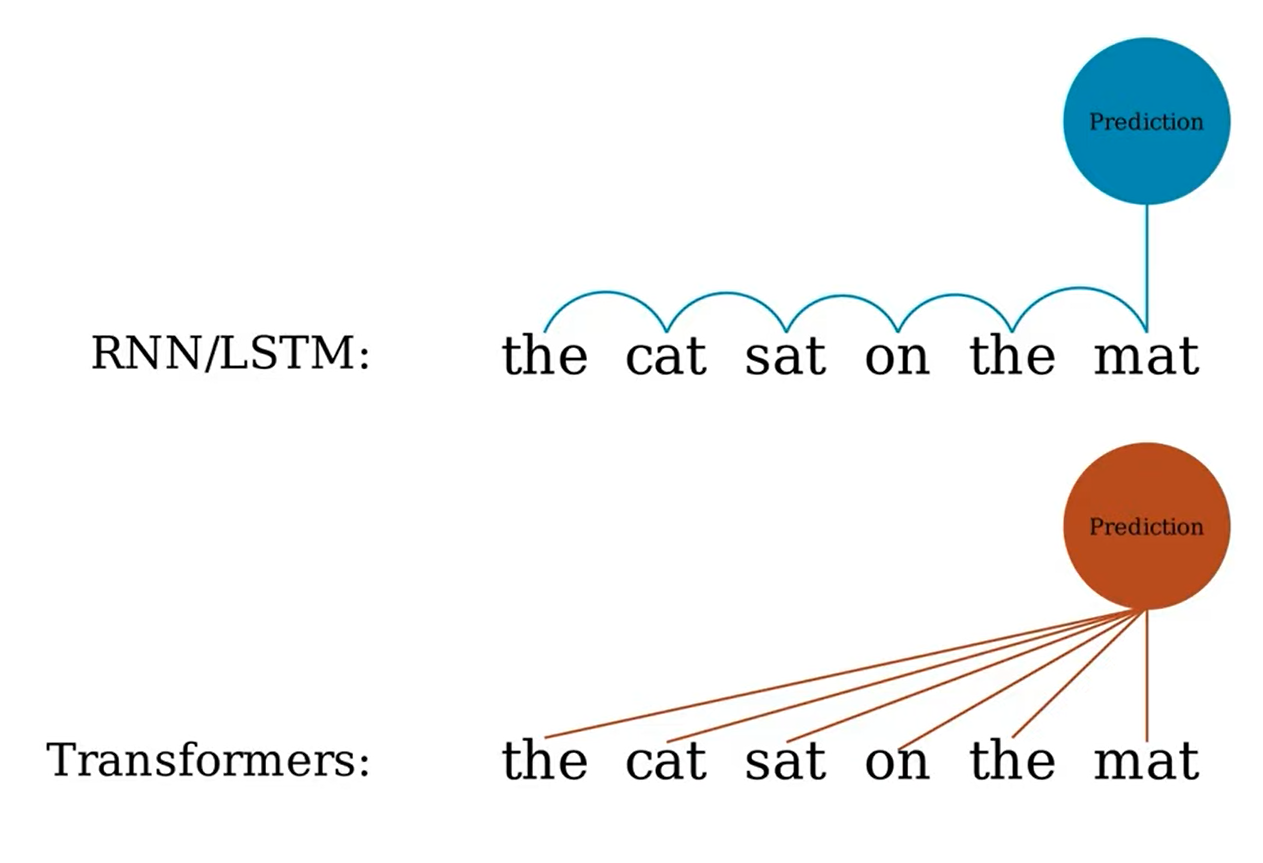

https://www.youtube.com/watch?v=NzLwHcqE6Jw

Зато... трансформеры требуют огромного количества памяти.

* _Stable Diffusion_ – модели от 10 Гб и больше
* _GPT_... давайте посмотрим на сайте

# Что такое Huggingface

* Сотни тысяч предобученных моделей
* Очень много датасетов (как и в kaggle, и в Google Dataset Search)
* HF Spaces

Пройдемся по https://huggingface.co/

Когда нужно хранить модель локально, а когда лучше пользоваться API?

## Примеры кода (pipeline)

Объекты Pipeline: https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/pipelines

Демо чат-бота:

- https://huggingface.co/tasks/conversational
- https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/pipelines#transformers.ConversationalPipeline

```python
from transformers import pipeline, Conversation

chatbot = pipeline(model="microsoft/DialoGPT-medium")
conversation = Conversation("Going to the movies tonight - any suggestions?")
conversation = chatbot(conversation)
conversation.generated_responses[-1]
>>> 'The Big Lebowski'

conversation.add_user_input("Is it an action movie?")
conversation = chatbot(conversation)
conversation.generated_responses[-1]
>>> "It's a comedy."
```

Онлайн-демо: https://huggingface.co/spaces/shawhin/vanilla-chatbot

# Задачи компьютерного зрения

* Оценка карты глубины по фотографии: https://huggingface.co/blog/cv_state#support-for-pipelines
* Классификация изображений
* Сегментация изображений
* Перевод изображения в изображение
* Детекция объектов
* Классификация видео
* Классификация без заранее определенных меток (ZeroShot Classification)

Перечень задач: https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#computer-vision

2024-06-18 19:21:56.443890: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-18 19:21:56.592296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 19:21:57.107292: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
No model was supplied, defaulted to Intel/dpt-large and revision e93beec (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
/home/rusttm/jupy_env/lib/python3.10/site-packages

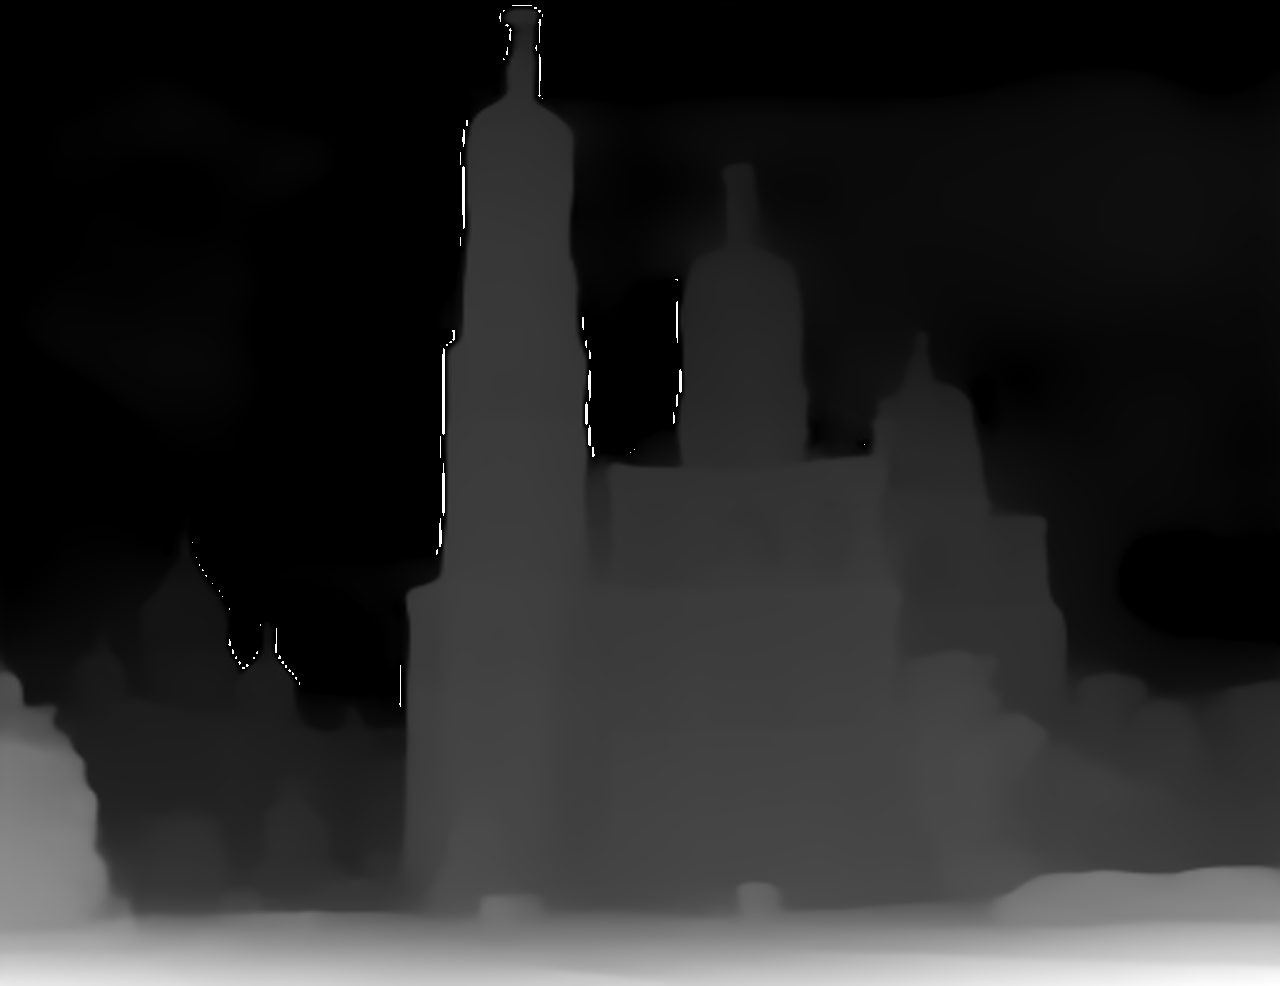

In [2]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation") # model="Intel/dpt-large"
# output = depth_estimator("https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0._%D0%9A%D1%80%D0%B5%D0%BC%D0%BB%D1%8C._%D0%9A%D0%BE%D0%BB%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D0%BD%D1%8F_%D0%98%D0%B2%D0%B0%D0%BD%D0%B0_%D0%92%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%B3%D0%BE_IMG_2111.2_e1b2sm_VIII-2009.jpg/1280px-%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0._%D0%9A%D1%80%D0%B5%D0%BC%D0%BB%D1%8C._%D0%9A%D0%BE%D0%BB%D0%BE%D0%BA%D0%BE%D0%BB%D1%8C%D0%BD%D1%8F_%D0%98%D0%B2%D0%B0%D0%BD%D0%B0_%D0%92%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%B3%D0%BE_IMG_2111.2_e1b2sm_VIII-2009.jpg")
output = depth_estimator("moscow.jpg")

# Вызов этой команды возвращает нам тензор, в котором дана оценочная информация
# об удаленности каждого объекта от зрителя (в метрах)
output["depth"]

Генерация изображений там тоже есть, но, как было сказано, диффузионные модели занимают огромное пространство в памяти.

In [3]:
#!pip install diffusers
# !pip install accelerate
from diffusers import DiffusionPipeline
generator = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
generator.to("cuda")
image = generator("An image of a squirrel in Picasso style").images[0]

/home/rusttm/jupy_env/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

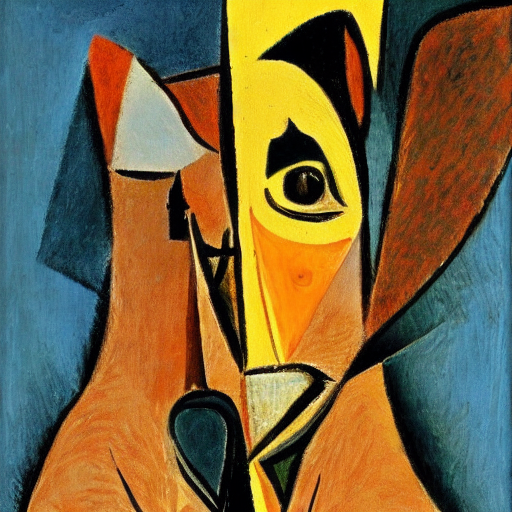

In [14]:
image

# Поработаем с текстом

Модели, понимающий русский язык: https://huggingface.co/models?language=ru

Например, поищем русские модели для перевода текста в речь: https://huggingface.co/docs/transformers/tasks/text-to-speech

In [4]:
from transformers import pipeline

question_answerer = pipeline(
    "question-answering",
    model="Den4ikAI/rubert-large-squad",
    tokenizer="Den4ikAI/rubert-large-squad"
)

/home/rusttm/jupy_env/lib/python3.10/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [5]:
context = """
Во́льфганг Амаде́й Мо́царт (нем. Wolfgang Amadeus Mozart, МФА МФА: [ˈvɔlfɡaŋ amaˈdeus ˈmoːtsaʁt](инф.); полное имя — Иога́нн Хризосто́м Во́льфганг Амаде́й Мо́царт; 27 января 1756, Зальцбург — 5 декабря 1791, Вена) — австрийский композитор и музыкант-виртуоз. Один из самых популярных классических композиторов, Моцарт оказал большое влияние на мировую музыкальную культуру.
По свидетельству современников, Моцарт обладал феноменальным музыкальным слухом, памятью и способностью к импровизации. Самый молодой член[К 1] Болонской филармонической академии (с 1770 года) за всю её историю, а также самый молодой кавалер ордена Золотой шпоры (1770)."""

In [6]:
result = question_answerer(question="Моцарт был кавалером какого ордена?", context=context)
print( result['answer'] )

Золотой шпоры


In [7]:
result

{'score': 0.5918429493904114,
 'start': 624,
 'end': 637,
 'answer': 'Золотой шпоры'}

In [8]:
result = question_answerer(question="Кем был Моцарт?", context=context)
print( result['answer'] )

австрийский композитор и музыкант-виртуоз


# Домашнее задание

Реализуйте классификацию эмоциональной окрашенности текстов при помощи объекта pipeline.

1. Найдите тип задач Sentiment Analysis на huggingface.co
2. Найдите модель для русского языка (примеры: rubert-tiny2..., rubert-base...)

In [9]:
import transformers

classifier = pipeline(model="seara/rubert-tiny2-russian-sentiment")


Выполните следующую ячейку. Если вы правильно инициализировали `pipeline`, вы получите относительно верные предсказания.

In [10]:
classifier( ["Отличный товар",
            "Мне не понравилось",
            "Прекрасно выглядит, ничего не меняйте!",
            "Ничего не понял",
            "У меня не работала розетка, в остальном все отлично"] )

[{'label': 'positive', 'score': 0.9941100478172302},
 {'label': 'neutral', 'score': 0.5911950469017029},
 {'label': 'positive', 'score': 0.9389205574989319},
 {'label': 'negative', 'score': 0.524005651473999},
 {'label': 'positive', 'score': 0.6734205484390259}]

# Как запустить сервис на основе модели?

Например, в Gradio:

1. https://huggingface.co/spaces/gradio/chatbot
2. https://www.kdnuggets.com/2023/06/build-ai-chatbot-5-minutes-hugging-face-gradio.html

Или в Huggingface Spaces: https://huggingface.co/spaces

# И напоследок поработаем с кодом

In [11]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="huggingface/CodeBERTa-small-v1",
    tokenizer="huggingface/CodeBERTa-small-v1"
)

Some weights of the model checkpoint at huggingface/CodeBERTa-small-v1 were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
python_code = """
# a list of numbers
my_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]
my_numbers.<mask>


"""

In [13]:
fill_mask( python_code )

[{'score': 0.537952721118927,
  'token': 1942,
  'token_str': 'sort',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.sort\n\n\n'},
 {'score': 0.08208320289850235,
  'token': 3059,
  'token_str': 'clear',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.clear\n\n\n'},
 {'score': 0.05829786881804466,
  'token': 5648,
  'token_str': 'reverse',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.reverse\n\n\n'},
 {'score': 0.0277408454567194,
  'token': 812,
  'token_str': 'append',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.append\n\n\n'},
 {'score': 0.01872050017118454,
  'token': 808,
  'token_str': 'length',
  'sequence': '\n# a list of numbers\nmy_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]\nmy_numbers.length\n\n\n'}]

# Библиография

https://colab.research.google.com/github/huggingface/notebooks/blob/master/transformers_doc/task_summary.ipynb#scrollTo=QGwpVScF2kZO

https://huggingface.co/huggingface/CodeBERTa-small-v1

https://huggingface.co/spaces/codeparrot/code-generation-models